 # 準備

In [9]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']
name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables, index=name)


In [14]:
df.head()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011


In [15]:
df.describe()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.543841,-0.011124,0.540212,0.852497,-0.574157,1.000479,-1.362024,-1.010469,1.605142,0.916961,0.523540,-0.100719,-0.116344,-0.271427,-1.640929,-2.161169,-0.234550,0.426216,2.103621,-0.823097
std,5.593704,5.021579,5.639676,7.185475,6.411257,4.959201,5.817630,6.290665,5.377922,6.007130,5.616616,5.982827,6.532491,7.027005,6.888048,5.807407,5.749898,5.839218,5.858236,6.830147
min,-8.686186,-11.014254,-13.063670,-14.887777,-12.715902,-9.252527,-12.893751,-12.215837,-8.547990,-12.568675,-12.565752,-12.874371,-11.604475,-12.914838,-13.020416,-11.742381,-10.979732,-10.780215,-11.935925,-13.294555
25%,-4.144940,-4.161809,-1.940475,-6.504940,-6.199207,-2.837972,-6.156073,-6.055951,-2.176886,-3.142244,-3.544418,-4.848950,-6.425292,-5.452595,-7.773425,-7.016971,-4.479033,-4.272937,-2.294885,-7.107632
50%,-0.842533,0.273704,0.802255,2.806971,-1.140522,1.905987,-0.691345,-1.003881,2.587896,-0.381474,-0.524481,-0.774824,-0.021912,0.117478,-1.851731,-2.394550,0.200719,1.460861,3.188114,-0.918579
75%,4.671538,4.282958,4.023140,7.269132,5.470677,4.484186,2.497944,3.670860,6.081132,6.409004,3.762367,5.362814,5.215765,4.962987,5.003856,2.230358,4.393867,4.472158,6.930322,4.694783
max,12.599023,9.682862,11.656496,12.186415,11.283413,12.401938,13.428952,11.863202,11.753299,12.581836,12.352950,10.523927,12.381189,12.640918,10.855463,10.313500,10.779629,12.455823,11.473295,11.717833


# 何種類のワインを店舗に置くか検討

## 樹状図を描く

樹状図を眺めると、枝分かれが、小さい方から2、４、９、１５あるとわかります。

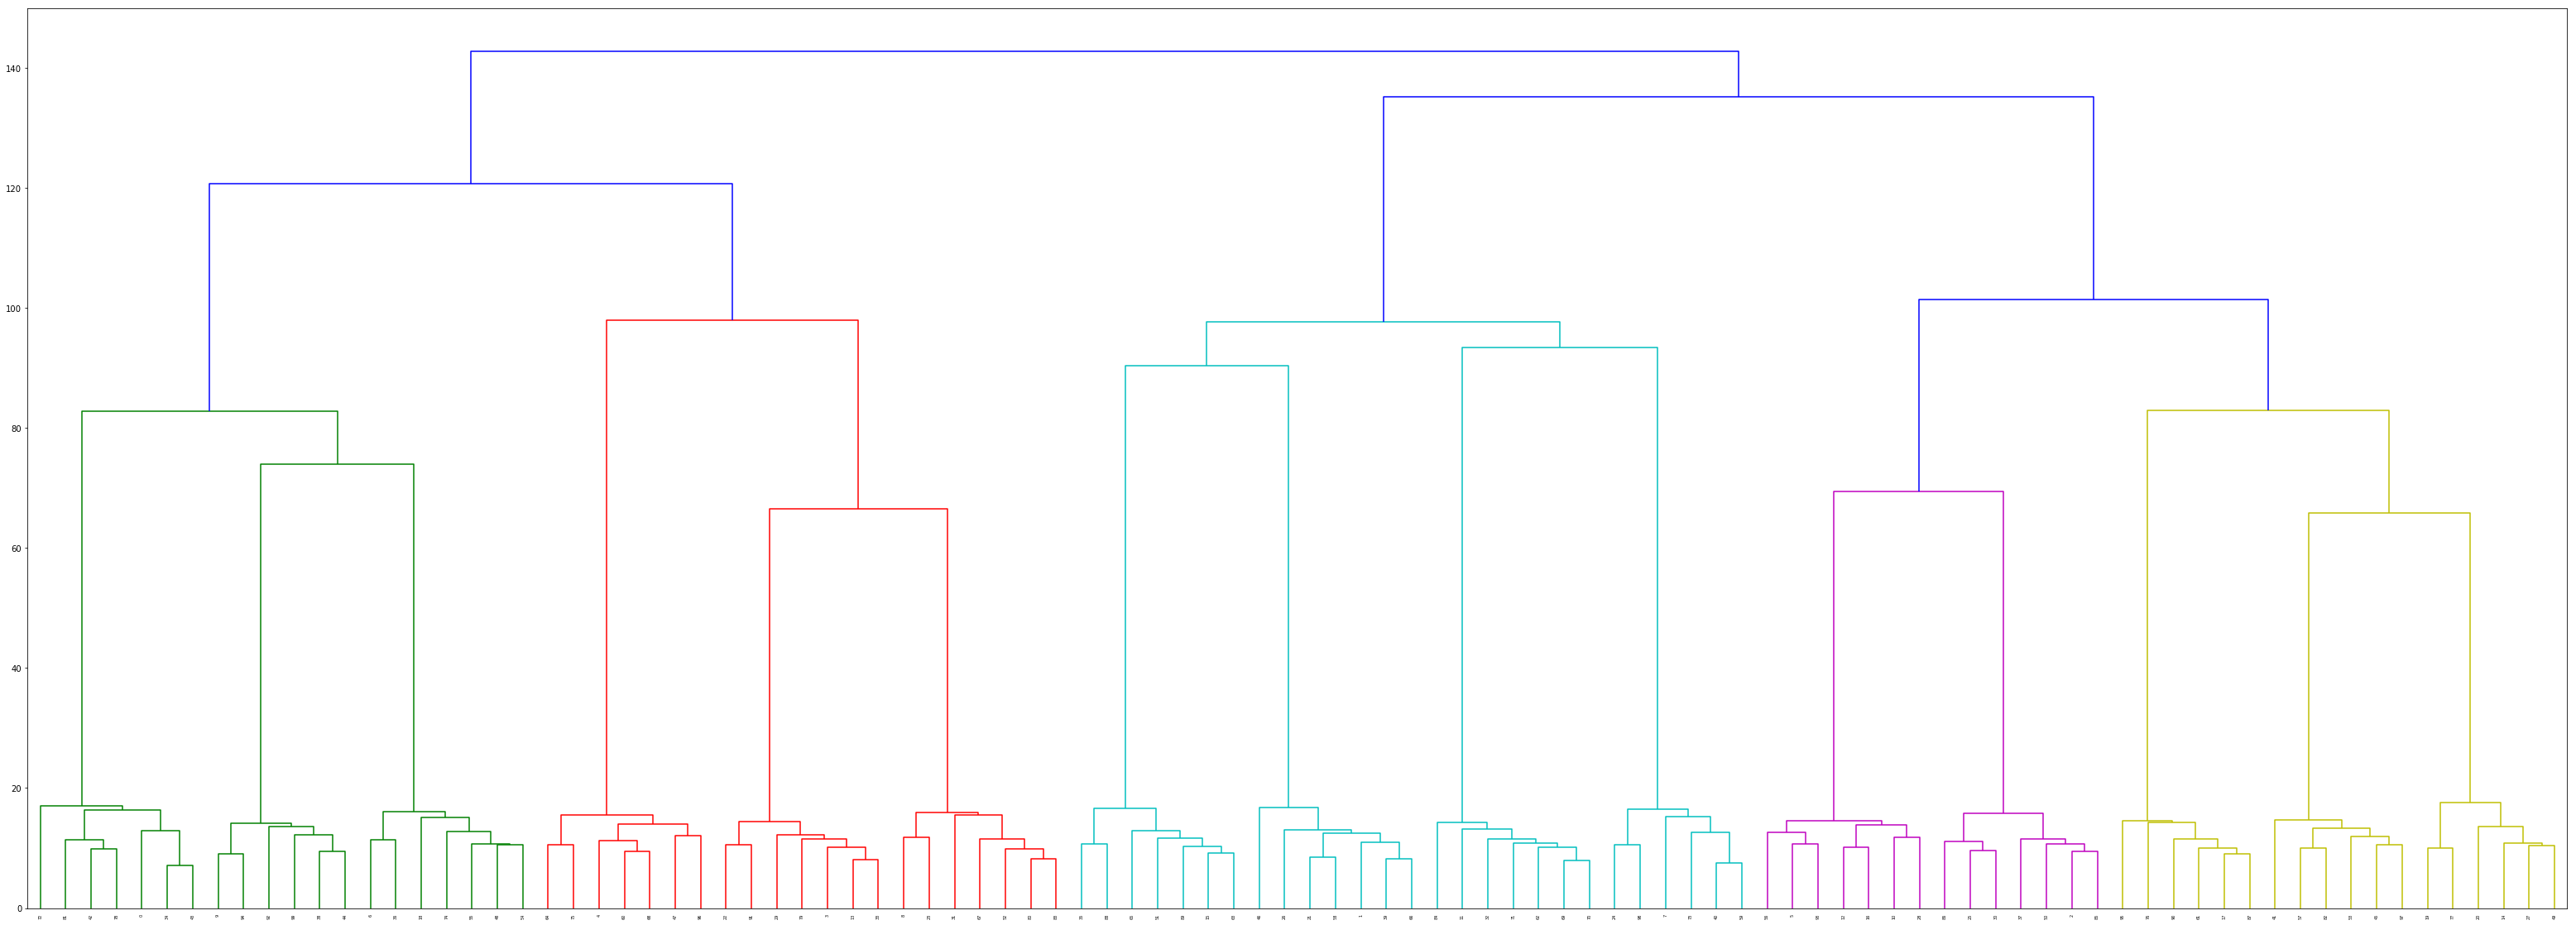

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#ward法を使う
plt.figure(figsize=(55,20))

row_clusters = linkage(df, method='ward')
row_dender = dendrogram(row_clusters)

plt.show()

## エルボー法を使用
11から12あたりに大きな曲折が確認できます。14から15にも同様の変化が確認できます。

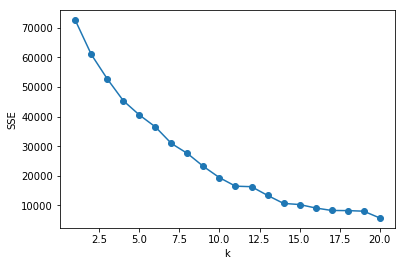

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='random', n_init=20, max_iter=300, tol=1e-04, random_state=0)
    km.fit(df)
    SSE.append(km.inertia_)

plt.plot(range(1,21), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

# シルエット分析

分割2では均等に分かれているが、シルエット係数が小さい。
一方、シルエット係数が最も大きいクラスタ数は13,15個になる。その中で13個の方は１３個のうちシルエット係数を１１個が上回っているのに対し、15個の方は12個である。

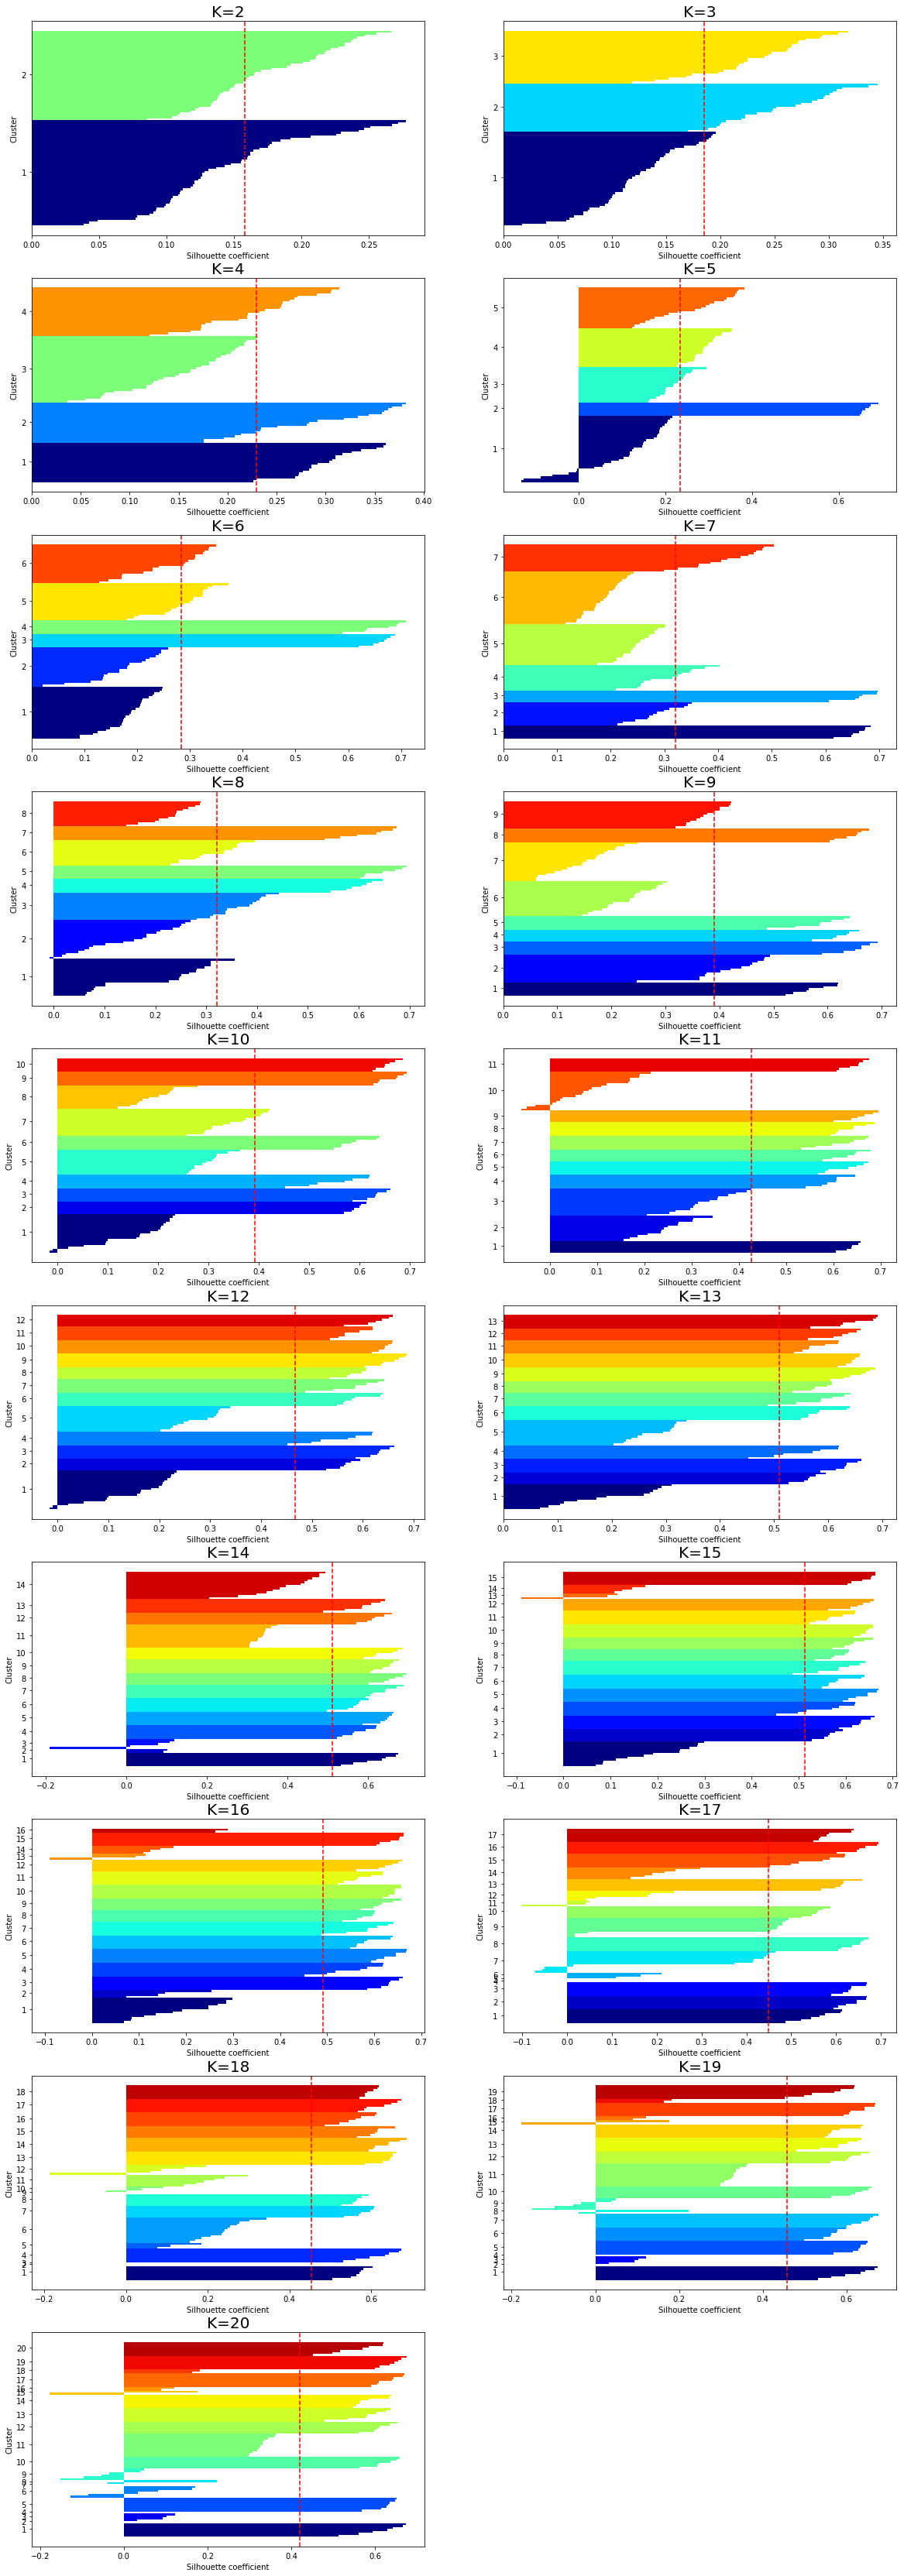

In [82]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(20,60))
for j in range(2,21):
    plt.subplot(10,2,j-1)
    km = KMeans(n_clusters=j, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(df)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('K='+str(j),fontsize=20)
plt.show()


エルボー法、樹状図、そしてシルエット分析を駆使して分析した結果、店舗に陳列するワインの種類数をできるだけ少なく、かつ異なる特徴のものをできうるだけ多く置くとすれば、
## 13種類
となります。